# Assignment 02: Import and Analyze Geospatial Datasets in Python (Part 1)
## GIS 5092: Applied Machine Learning for GIS and Remote Sensing (Fall 2022)

## Learning Objectives:

* Image vs Geospatial Image
* Importing and plotting images
* Change image shapes
* Standerdize images
* Open shapefiles using Python packages
* Read tabular data
* Combine shapefiles and images to prepare datasets

# IMPORTANT
Whenever you want to keep a copy of this notebook, remember to sign in with your appropriate google account (SLU Google Account is suggested), and save a copy of it in your preferred Google Drive location (preferable location is a seperate folder in your Google Drive for seperate projects, also avoid spaces in folder/file names).

# How to submit?
Write your answers in places where you see **YOUR ANSWER HERE** within the **#### ... ####** comments. If your answer is code, then use the Code cell, if its text, then use the Text cell. Save a copy of this notebook in your Google Drive by replacing the STUDENT with your SURNAME in CAPS. Then Download the notebook in your computer's hard drive by doing <code>File > Download > Download .ipynb </code>.



---



---



# Prepare this notebook

* The datasets required for this lab are already provided. Please download the .zip file in your computer. Unzip it. Create a lab folder (for example, assignment_02) in your Google Drive (preferably your SLU google drive). Upload the contents from your computer to the Google Drive folder.
* Mount your Google Drive



In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* Navigate to your lab folder (where you are doing everything for this lab), and make that folder as the *working directory* for this notebook. That means, you dont have to type in long redundant paths everytime to read or write data. You can start your path from the *working directory*.  
 **PRO TIP:** Navigate to your desired folder (from which you want the path) in the left pane of Colab, right click on it, hit *Copy path*. Then paste it. You dont have to type the full path all the time.

In [112]:
# To ease up handling filepaths, we will use the os module from Python
import os

# Make the desired folder as Current Working Directory
os.chdir('/content/drive/MyDrive/lab2')

* Check the current working directory:

In [113]:
print(os.getcwd())

/content/drive/MyDrive/lab2


# Normal Image

There are several ways to read an image in Python. Let's try OpenCV first. Our desired image is located in the *lab2* folder within our CWD (Current Working Directory).

In [114]:
import cv2 # CV2 is opencv

In [115]:
dir = r"/content/drive/MyDrive/lab2/gatewayarch.png"

In [116]:
img1 = cv2.imread(dir)

Here we have used a '.' in the begining to let the path know that everything followed by '.' should be put into the CWD. That's how we dont have to write the entire path everytime.

Check the type of <code>img1</code> variable.

In [117]:
type(img1)

numpy.ndarray

Since its a numpy n-dimensional array, we can check the shape of it.

In [118]:
img1.shape

(400, 600, 3)

We can visualize the image by using matplotlib functionality.

In [119]:
import matplotlib.pyplot as plt

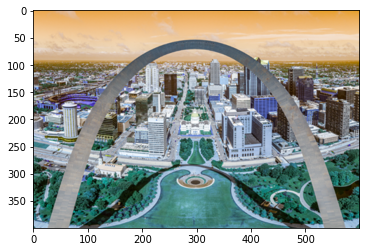

In [120]:
plt.imshow(img1)
plt.show()

The sky looks yellowish here because the 3 channels of the image are not aligned accurately. The cv2.imread function reads the image as BGR (Blue-Green-Red), but the plt.imshow function thinks the image is as RGB. We need to convert the BGR to RGB.

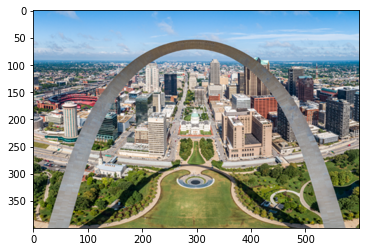

In [121]:
# Convert the channel orientation
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# Show it
plt.imshow(img1)
plt.show()

**Q01:** Since the variable <code>img1</code> is a np array, calculate the following information of the image:  
* Mean and standard deviation of Red channel
* Mean and standard deviation of Blue channel
* Mean and standard deviation of Green channel

*Hint:* The order of the transformed image is now in Red, Green, and Blue.

In [122]:
import numpy as np

In [123]:
### YOUR ANSWER HERE ###
#Red channel
img1_red = img1[:,:,0]
meanR = np.mean(img1[:,:,0])
stdR = np.std(img1[:,:,0])


print(meanR)
print(stdR)

#Green Channel
img1_green = img1[:,:,1]
meanG = np.mean(img1[:,:,1])
stdG = np.std(img1[:,:,1])

print(meanG)
print(stdG)

#Blue Channel
img1_blue = img1[:,:,2]
meanB = np.mean(img1[:,:,2])
stdB = np.std(img1[:,:,2])

print(meanB)
print(stdB)



########################

132.05617083333334
55.51144137927019
142.62186666666668
52.00743142586025
137.744025
71.8522891201065


We can also create a histogram of each channel.

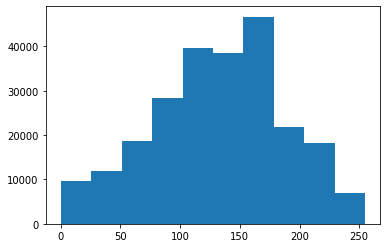

In [124]:
# Flatten the red channel array
img1_red_flat = np.ravel(img1_red)
# Or you can use reshape
img1_red_flat = img1_red.reshape(-1)

plt.hist(img1_red_flat)
plt.show()

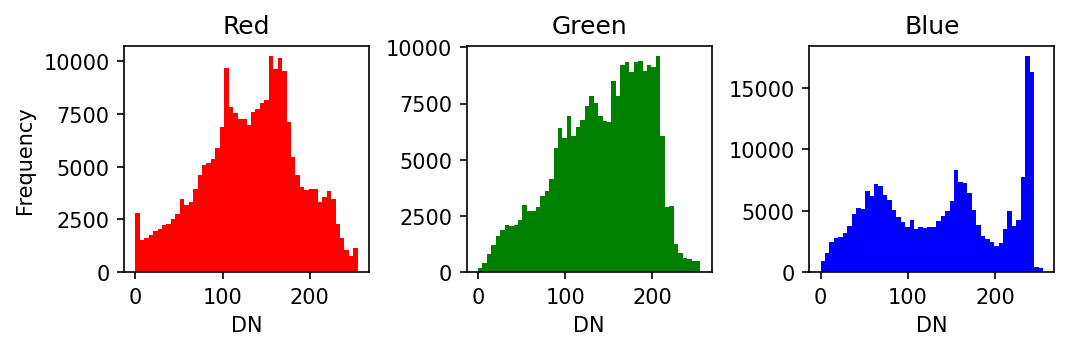

In [125]:
# Make the figure more professional

# Create a figure with subplots and define resolution and size
fig, ax = plt.subplots(1, 3, figsize=(8, 2), dpi=150)

# We can access each ax (subplot) by their index
ax[0].hist(np.ravel(img1_red), bins=50, color='red')
ax[1].hist(np.ravel(img1_green), bins=50, color='green')
ax[2].hist(np.ravel(img1_blue), bins=50, color='blue')

# Add titles
# Using loops be little efficient (handy when you have lots of subplots)
for i, title in enumerate(['Red', 'Green', 'Blue']):
    ax[i].set_title(title)

# Add x and y labels
ax[0].set_ylabel('Frequency')
for i in range(3):
    ax[i].set_xlabel('DN')

# Adjust the gap between subplots
plt.subplots_adjust(wspace=0.4)
plt.show()

Plotting beautiful figures in Python takes time to learn. You will learn quick tips and tricks while you are doing different data visualization and look at others codes. Here is a good [repository](https://github.com/ifrankandrade/data-visualization) as a starter. But keep an eye out there to catch different plotting ideas.

**Q02.** Divide the <code>img1</code> by 255 so the value range of each channel can be from 0 to 1. Then multiply the red, green and blue channels with factors of 1.8, 2.1, and 0.8, respectively. Store the resulting np array in a variable named <code>img1_fac</code> and visualize it using <code>plt.imshow</code>

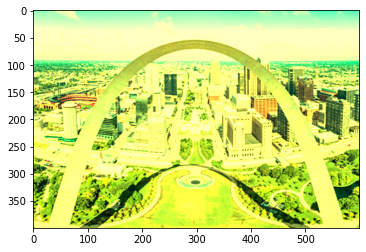

In [126]:
### YOUR ANSWER HERE ###
div = np.divide(img1, 255)

r,g,b = cv2.split(div)
r = np.multiply(r, 1.8)
g = np.multiply(g, 2.1)
b = np.multiply(b, 0.8)


img1_fac = cv2.merge((r,g,b))

plt.imshow(img1_fac)
plt.show()

########################

**Q03.** Create a function named <code>show_histogram()</code> that takes a np image (for example <code>img1_fac</code>) as argument and shows a nice figure of histograms for each channel. Apply that function to <code>img1_fac</code> and get the histograms of this image.  
*Hint:* Use the codes provided for the previous histogram figure. Remember to change necessary variables.

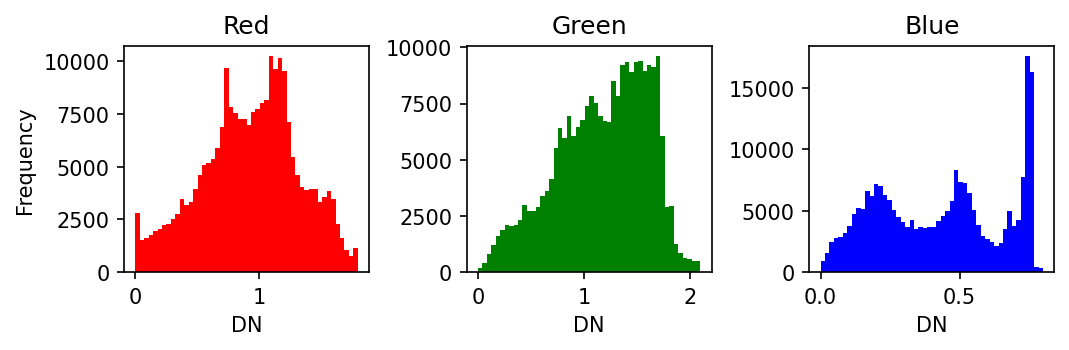

In [127]:
def show_histogram(img):
  ### YOUR ANSWER HERE ###
  r = img[:,:,0]
  g = img[:,:,1]
  b = img[:,:,2]
  fig, ax = plt.subplots(1, 3, figsize=(8, 2), dpi=150)
  ax[0].hist(np.ravel(r), bins=50, color='red')
  ax[1].hist(np.ravel(g), bins=50, color='green')
  ax[2].hist(np.ravel(b), bins=50, color='blue')
  
  for i, title in enumerate(['Red', 'Green', 'Blue']):
     ax[i].set_title(title)
     ax[0].set_ylabel('Frequency')
  for i in range(3):
       ax[i].set_xlabel('DN')
  plt.subplots_adjust(wspace=0.4)
  plt.show()



    ########################

show_histogram(img1_fac)

**Q04.** Read the <code>stlouis_night.jpg</code> image provided in the lab2 folder using opencv. Store the image in a variable named <code>img2</code>. Then show the image using <code>plt.imshow</code> and visualize the histogram of each channel using the function you just created before, <code>show_histogram(img)</code>. The resulting image should be something like this:

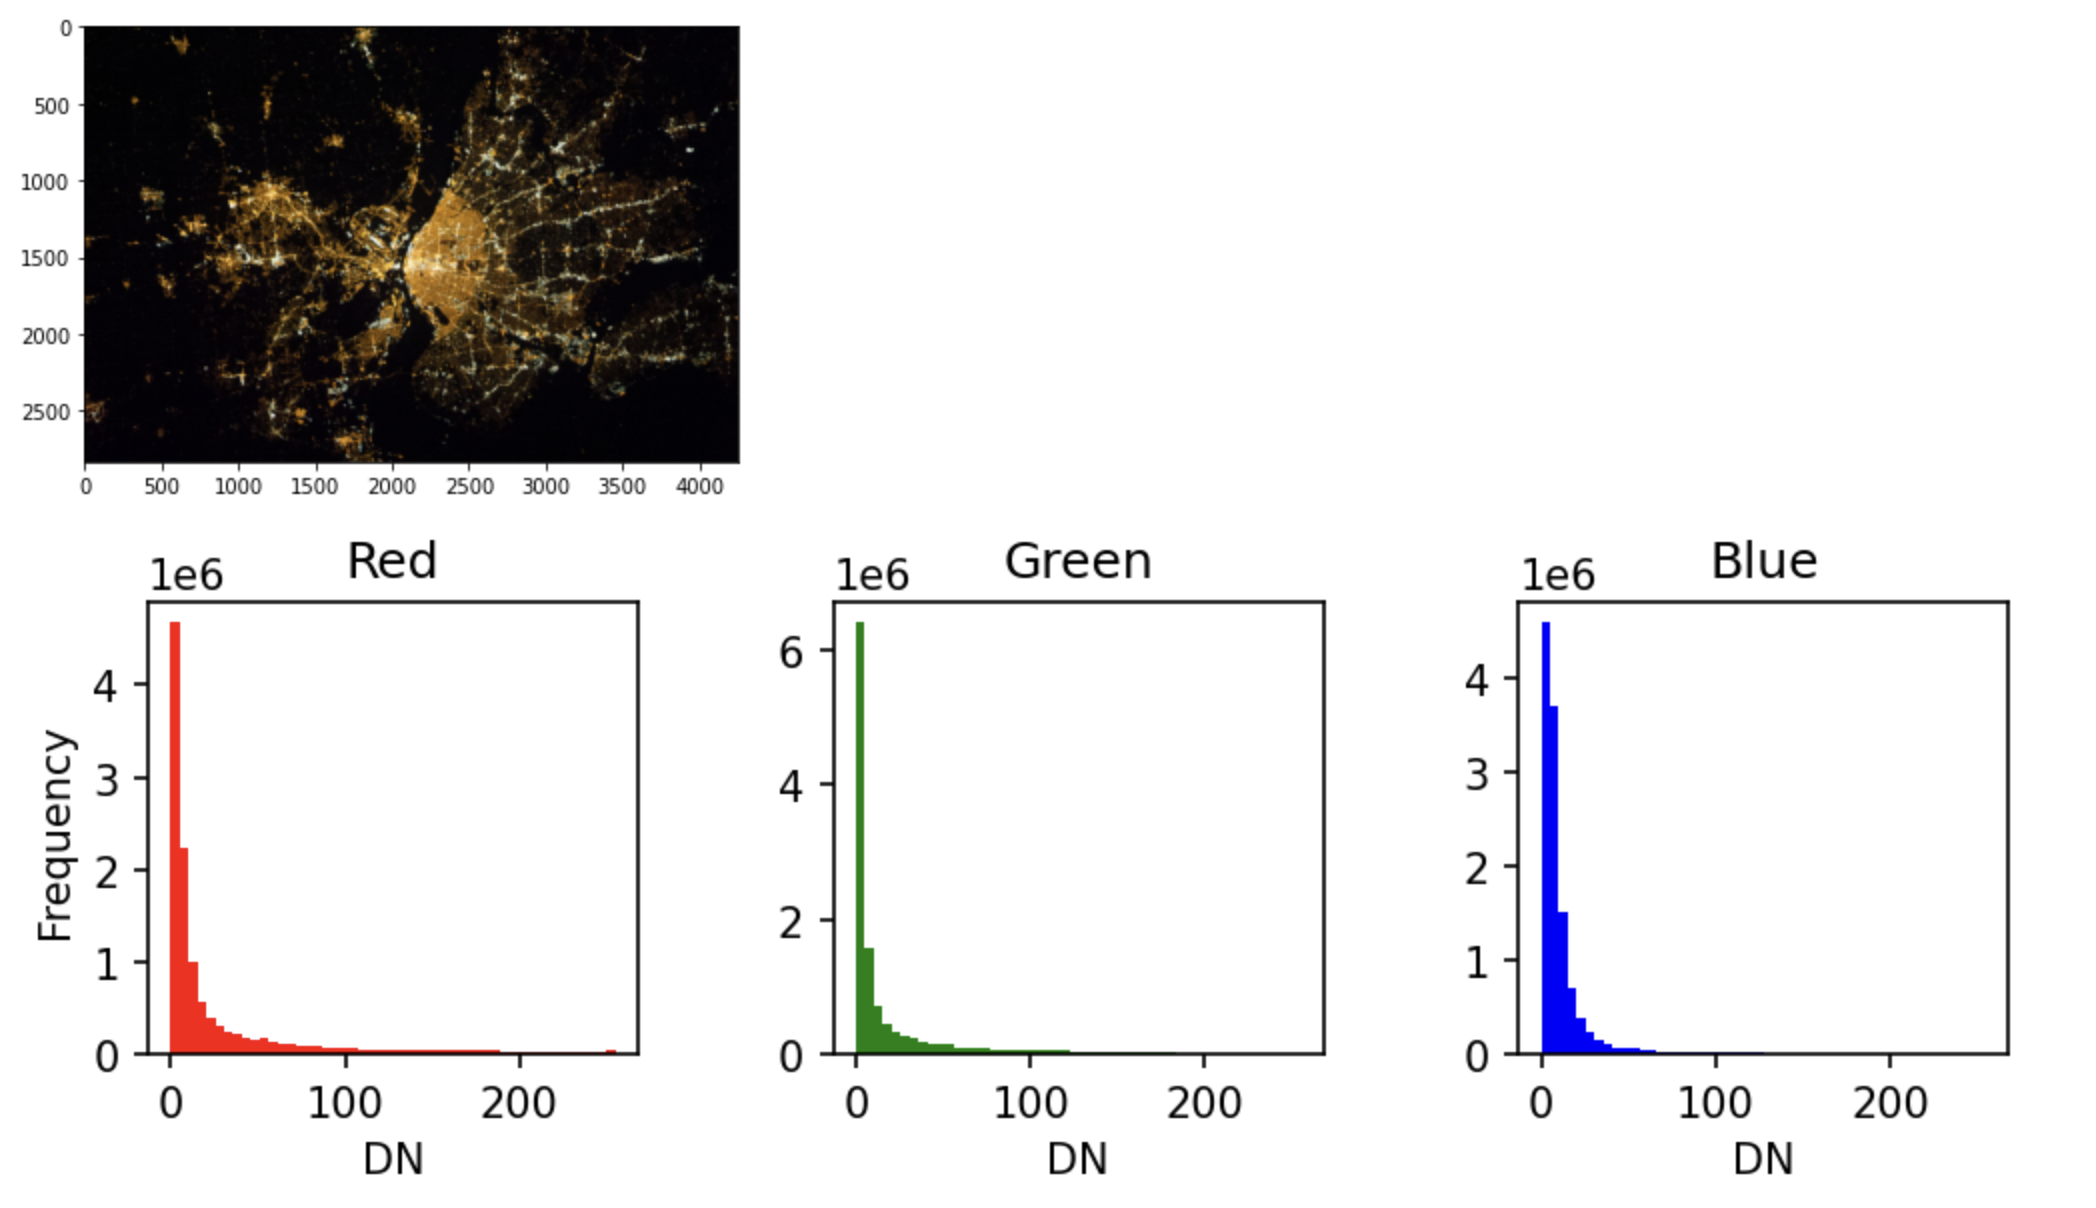

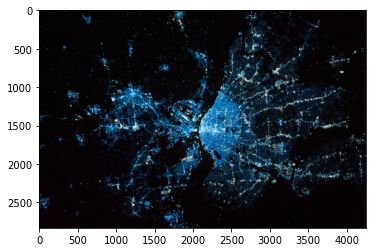

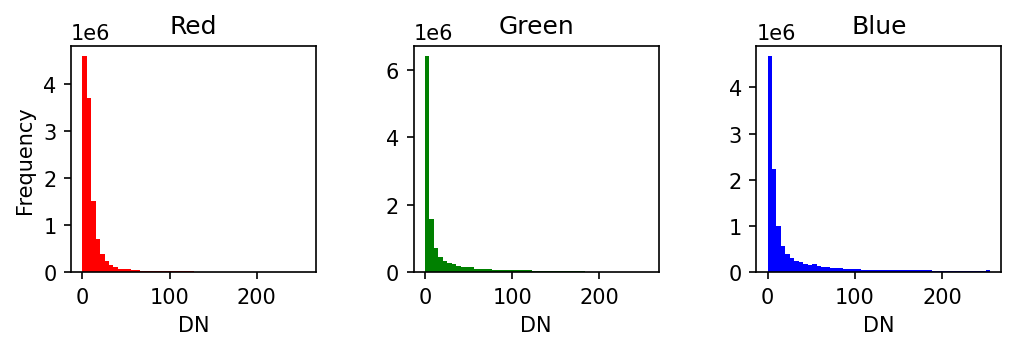

In [128]:
### YOUR ANSWER HERE ###
dir = r"/content/drive/MyDrive/lab2/stlouis_night.jpg"
img2 = cv2.imread(dir)
plt.imshow(img2)
plt.show()
show_histogram(img2)

########################

### Image resizing

Sometimes we may need to resize an image. For example the number of pixels in the x-axis for <code>img1</code> is 600 and for y-axis its 400. This means that the number of rows are 400 and number of columns are 600. We may need to make it a resolution of 32 by 32 pixels. OpenCV can do that.

(32, 32, 3)


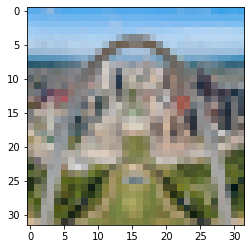

In [129]:
img1_res = cv2.resize(img1, (32, 32), interpolation=cv2.INTER_AREA)

print(img1_res.shape)

plt.imshow(img1_res)
plt.show()

Since we are changing the image resolution, we have to define the interpolation method. There are many interpolation methods available in <code>cv2.resize</code> function ([More information](hthttps://docs.opencv.org/3.4/da/d54/group__imgproc__transform.htmltps://)), from which we used the INTER_AREA interpolation.

**Q05.** Create a figure with 3 subplots in a row. Then imshow 3 resized image of <code>img1</code> using INTER_LINEAR, INTER_AREA, and INTER_NEAREST intrpolation method. Resize the images to 64 by 64 pixels. Set titles of each image. Then in a text cell, describe the major differences you can notice from three interpolation methods. Which one is useful for which case?

(64, 64, 3)


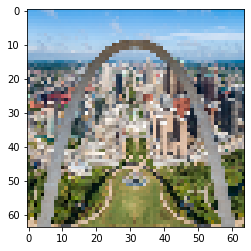

In [130]:
img1_linear = cv2.resize(img1, (64, 64), interpolation=cv2.INTER_LINEAR)
print(img1_linear.shape)

plt.imshow(img1_linear)
plt.show()

(64, 64, 3)


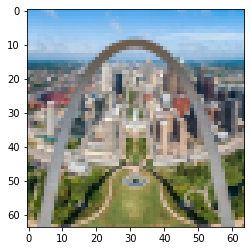

In [131]:
img1_area = cv2.resize(img1, (64, 64), interpolation=cv2.INTER_AREA)
print(img1_area.shape)

plt.imshow(img1_area)
plt.show()

(64, 64, 3)


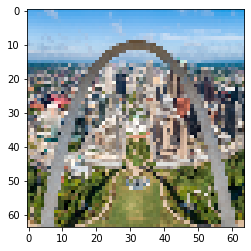

In [132]:
img1_nearest = cv2.resize(img1, (64, 64), interpolation=cv2.INTER_NEAREST)
print(img1_nearest.shape)

plt.imshow(img1_nearest)
plt.show()

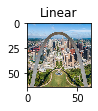

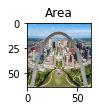

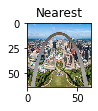

In [133]:
### YOUR ANSWER HERE ###

img1_linear = cv2.resize(img1, (64, 64), interpolation=cv2.INTER_LINEAR)
img1_area = cv2.resize(img1, (64, 64), interpolation=cv2.INTER_AREA)
img1_nearest = cv2.resize(img1, (64, 64), interpolation=cv2.INTER_NEAREST)

plt.subplot(3, 1, 1)
plt.title("Linear")
plt.imshow(img1_linear)
plt.show()


plt.subplot(3, 1, 2)
plt.title("Area")
plt.imshow(img1_area)
plt.show()

plt.subplot(3, 1, 3)
plt.title("Nearest")
plt.imshow(img1_nearest)
plt.show()



########################

\#### Your Answer Here ####

**Don't know why they're so small when I try to plot them together but I did them each seperately just to show that I did plot them and could see them, and then all together to meet the reqs about titles and what not.

Anyway what I noticed is linear is pixelated but keeps the colors seperate, area is the "clearest" while still being fuzzy, and nearest is the most pixelated while also seemingly "mixing" the colors. Linear is preferable for enlarging an image, area is preferable for shrinking an image, and nearest is good for when you don't want the pixels to mix at all**

# Geospatial Image

A geospatial image usually have location information attached to each of the pixel. Therefore, it comes with a coordinate reference system (or CRS). There are some other differences too and we will learn those key features by using a python package called *rasterio*. *rasterio* is not preinstalled in colab. So everytime you start a new runtime in your colab, you need to install it.

In [134]:
# Check if rasterio is installed,
# if not, install it
try:
    import rasterio
except:
    !pip install rasterio
    import rasterio

Open a sample geospatial raster data provided in the lab folder.

**Data Description:** The image was collected using a UAV equipped with a MicaSense RedEdge camera. This camera provides image with 5 channels. The order of the channels here are Blue, Green, Red, Red-edge, and Near-infrared. For more information about Altum camera, please refer to [the official website](https://micasense.com/rededge-mx/). The image resembles the Sorghum plant from Maricopa, Arizona. The image was collected in the summer of 2018 by [Remote Sensing Lab SLU](http://www.remotesensinglab.org/).

In [135]:
# Open the raster data
src = rasterio.open('/content/drive/MyDrive/lab2/msi_sorghum.tif')

/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:475: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / 0.8)


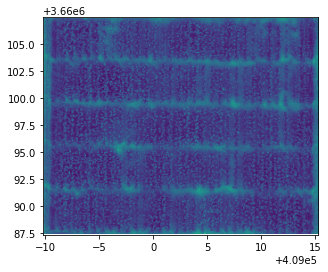

In [136]:
# We can visualize the image using plotting functions from rasterio
# Since its not like a normal image, we should use rasterio plotting functions
# to tackle the image operations

from rasterio.plot import show

show(src)

In [137]:
# Whenever you use a new package, its always a good idea to observe its datatype first
type(src)

rasterio.io.DatasetReader

It is a rasterio *object*. Objects are great features of Python and sometimes they are very efficient to use. Unlike opencv, it does not directly return a numpy array. To get a numpy array, we have to do this:

In [138]:
# Get the image as np array
msi = src.read()
# Check its shape
print(msi.shape)

(5, 1097, 1388)


That means the image has 5 bands, 1097 rows, and 1388 columns. In opencv, the channel dimension was positioned last. But here, it is positioned at the begining. We have to be careful about the position of dimensions. That's why its always good to check the shape of your array before doing anything.

If we want to plot it, we know that <code>plt.imshow</code> only understands image as RGB. Here our image is definitely NOT a RGB. The channel dimensions are ordered as blue, green, red, red-edge, and near-infrared. Let's visualize the blue band only.

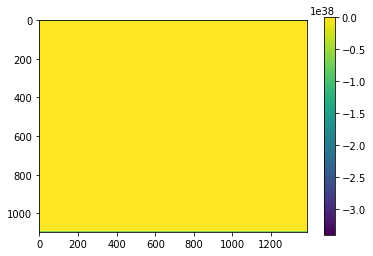

In [139]:
plt.imshow(msi[0, :, :]) # 0 is the first index position of the channel dimension
plt.colorbar()
plt.show()

Why the image looks flat yellow? Also why the lowest value is so low? Something to the power of 38 in the negative direction!

Answer: Because of the NoData. In geospatial images, you may notice the existence of NoData before. Usually NoData are pixels which are kept intentionally blank and an extremely high or low value are assigned to these pixels. Look at the rasterio plot in the bottom most line of pixels. You can see a white strip which are actually NoData. rasterio knows this since the information is embedded into a geospatial data. But the matplotlib does not know that. Therefore, we need to replace the extreme values with a NoData of numpy, i.e., np.nan value. Matplotlib understands np.nan as nodata.

In [140]:
# Lets look at the value of nodata
print(src.nodata)

-3.4028230607370965e+38


We can use array indexing with conditions. The condition can be "show me the pixels which are equals to the nodata value". Then make those pixels np.nan. We can do the following:

In [141]:
msi[msi == np.float32(src.nodata)] = np.nan
#  (----------condition----------)   (-value-)

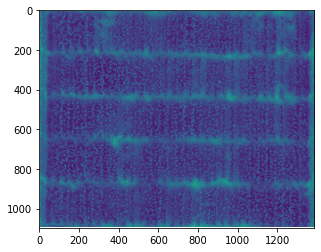

In [142]:
# Now plot the blue channel
plt.imshow(msi[0, :, :])
plt.show()

**Important:** Understand how we replaced some values based on condition in a numpy array. This operation will be very handy in future.

**Q06
.** Why in the condition, we did <code>np.float32(src.nodata)</code>? What would happen if we did not do the <code>np.float32()</code>? Please explain.

\#### Your Answer Here ####

***We did that in order for pixels, whose values are equivalent to no data, would show up in the plotting. If we did not do the np.float32(), the plot would not switch from yellow to blue, because the pixels responsible for switching the solor would not register because of their values. Also we did it to convert the object into something that can be plotted. We would get a float error that says a float object is not subscriptable if we did not. ***

**Q07.** Create a figure with 5 subplots and visualize all the 5 channels in the following order: Blue, Green, Red, Red-Edge, NIR. Also, do the following things:
* Use a figure size of 8, 2 and dpi of 150.
* Remove the xticks and yticks (the tickmarks showing pixel numbers)
* Set titles of each channel
* Change the colormap from blue-green to simple greyscale (*Hint:* use <code>cmap</code>)
* Adjust the subplot positions if necessary

The resulting image should be something like this:

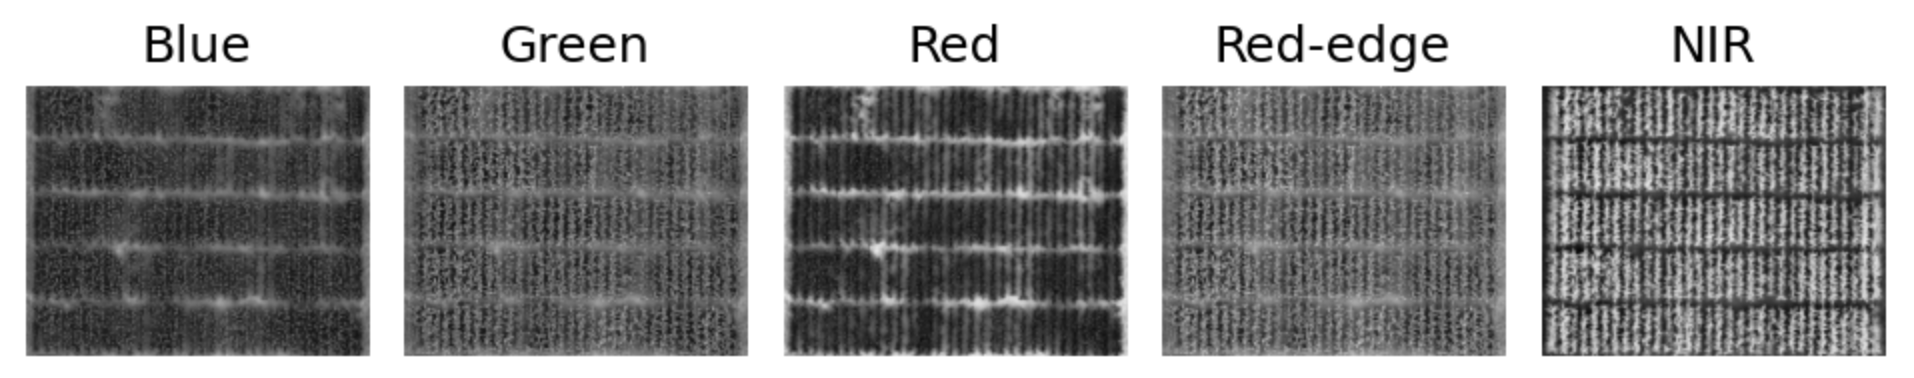

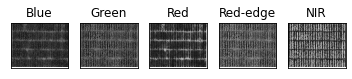

<Figure size 1200x300 with 0 Axes>

In [143]:
### YOUR ANSWER HERE ###
f, axarr = plt.subplots(1,5)
f = plt.figure(figsize=(8,2), dpi = 150)
for ax in axarr:
    ax.set_xticks([])
    ax.set_yticks([])
axarr[0].imshow(msi[0,:,:], cmap='gray')
axarr[0].title.set_text('Blue')
axarr[1].imshow(msi[1,:,:], cmap='gray')
axarr[1].title.set_text('Green')
axarr[2].imshow(msi[2,:,:], cmap='gray')
axarr[2].title.set_text('Red')
axarr[3].imshow(msi[3,:,:], cmap='gray')
axarr[3].title.set_text('Red-edge')
axarr[4].imshow(msi[4,:,:], cmap='gray')
axarr[4].title.set_text('NIR')




########################

If you are familier with multispctral images (in remote sensing class), then you should know about False Color Composite. Lets create a false color composite with NIR, Red, and Green channels as Red, Green, and Blue colors. To do this we need to stack the individual channels together so that they make a 3D array.

In [144]:
# Stack three bands together
msi_false1 = np.dstack((msi[4, :, :], msi[2, :, :], msi[1, :, :]))
print(msi_false1.shape)

(1097, 1388, 3)


Notice that the channel dimension is now in the right side (last position). Because that's how <code>np.dstack</code> results an array.

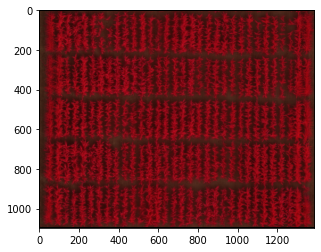

In [145]:
# Visualize the image
plt.imshow(msi_false1)
plt.show()

To make the image little bit brighter, we can multiply all the values by a factor of 2.0. **Note that,** this is just for visualization purpose. We dont want our pixel values to be multiplied by anything for analysis. But to visualize it in better way, we can do that.

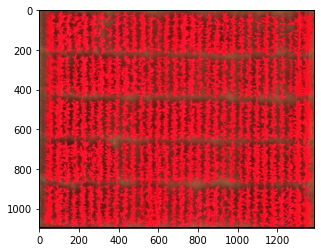

In [146]:
# Visualize the image after enhancement
plt.imshow(msi_false1*2.0)
plt.show()

**Q08.** Create two more False Color Composites: one with Red-edge, Red, Green (name it <code>msi_false2</code>), and the other with NIR, Red-edge, Red (name it <code>msi_false3</code>). Multiply with some factor while visualizing it, the factor can be any number you like. Show all three images (<code>msi_false1</code>, <code>msi_false2</code>, <code>msi_false3</code>) in a Figure as subpltos. Follow the instructions:
* Use a figure size of 8, 2 and dpi of 150.
* Remove the xticks and yticks (the tickmarks showing pixel numbers)
* Set titles of each subplot as their composite
* Adjust the subplot positions if necessary

The resulting image should be something like this:

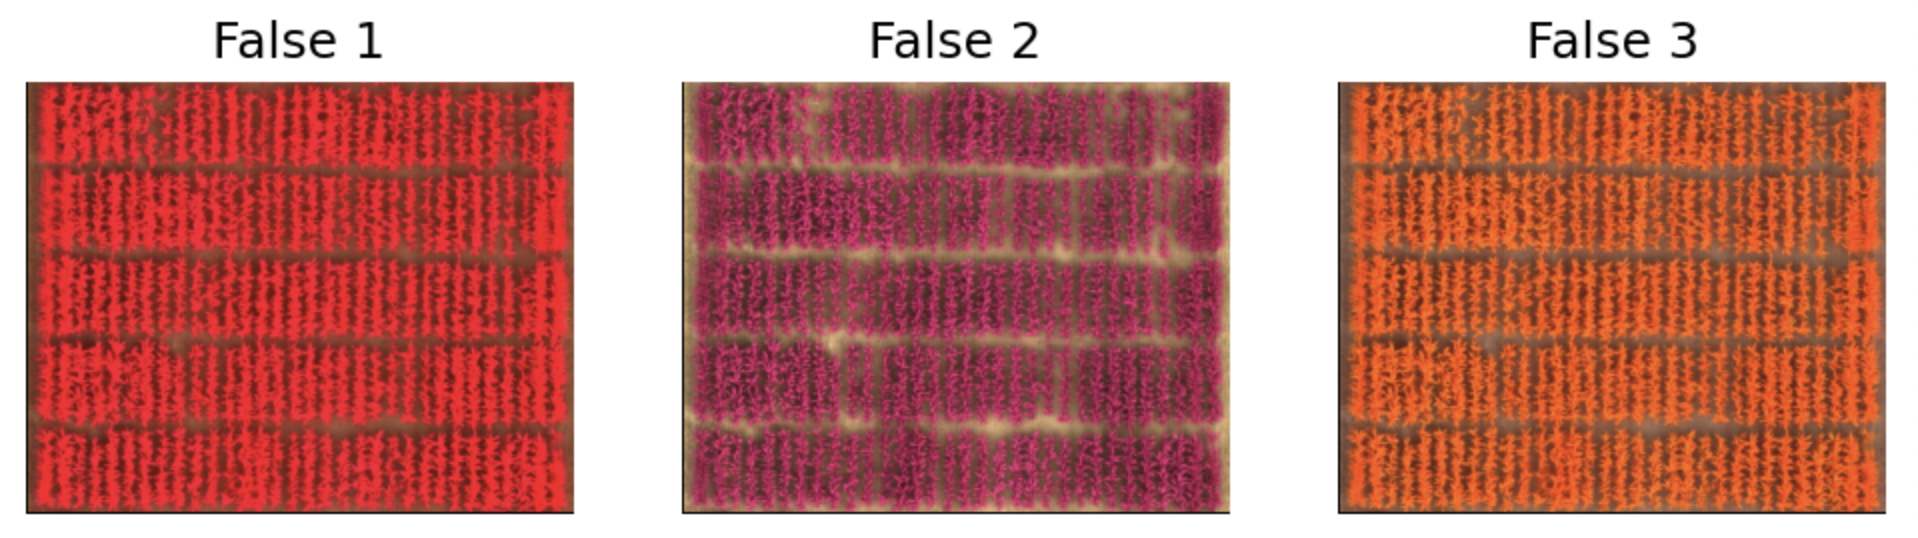

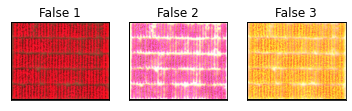

<Figure size 1200x300 with 0 Axes>

In [147]:
### YOUR ANSWER HERE ###
f, axarr = plt.subplots(1,3)
f = plt.figure(figsize=(8,2), dpi = 150)
for ax in axarr:
    ax.set_xticks([])
    ax.set_yticks([])
msi_false2 = np.dstack((msi[3,:,:], msi[2,:,:], msi[1,:,:]))
msi_false3 = np.dstack((msi[4,:,:], msi[3,:,:], msi[2,:,:]))
axarr[0].imshow(msi_false1 * 2)
axarr[0].title.set_text('False 1')
axarr[1].imshow(msi_false2 * 10)
axarr[1].title.set_text('False 2')
axarr[2].imshow(msi_false3 * 5)
axarr[2].title.set_text('False 3')


########################

**Q09.** If you are familier with remote sensing of vegetation, you should have calculated the value of Normalized Difference Vegetation Index (NDVI). NDVI is a very popluar vegetation index that represents overall vegetation health status. The equation to calculate NDVI is:

\begin{equation*}
  NDVI = \frac{NIR-Red}{NIR+Red}
\end{equation*}

Since you can get the individual NIR and Red channels of <code>msi</code>, calculate the NDVI raster of the <code>msi</code> and visualize it with showing the colorbar.
* Use a figure size of 8, 2 and dpi of 150.
* Use appropriate title.
* Remove the xticks and yticks (the tickmarks showing pixel numbers)  

The resulting image should be something like this:

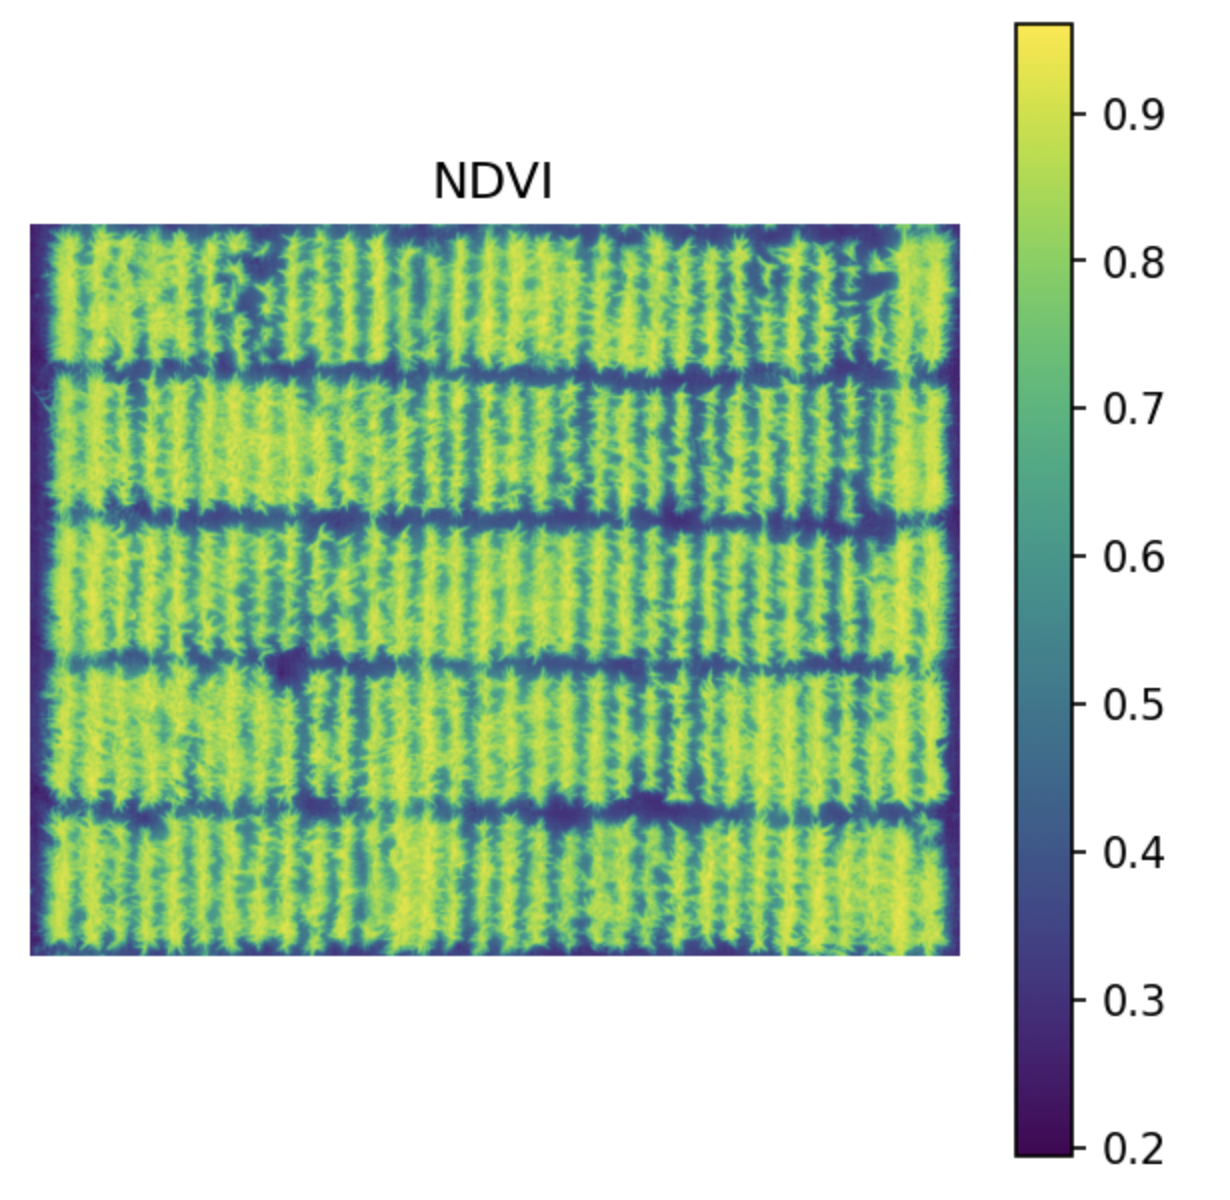

(-0.5, 1387.5, 1096.5, -0.5)

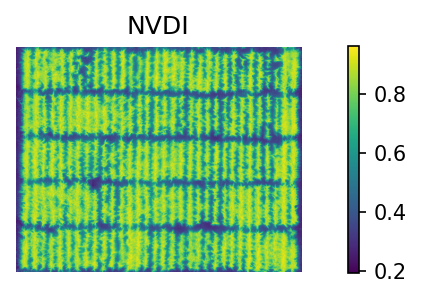

In [148]:
### YOUR ANSWER HERE ###
msi_nvdi = (((msi[4,:,:] - msi[2,:,:]) / (msi[4,:,:] + msi[2,:,:])))
plt.figure(figsize = (8, 2), dpi = 150)
plt.imshow(msi_nvdi)
plt.title("NVDI")
plt.colorbar()
plt.axis("off")

########################

The values of NDVI ranges from 0 to 1. Higher the values, healthier the vegetation pixel is. Therefore, we can try to create a vegetation mask that consists of pure vegetation pixels. For example, the np array can be a binary array with 0s and 1s, where the 1 represent vegetation pixel and 0 means not vegetation.

**Q10.** Create a function that returns pure vegetation pixels from a given NDVI image and a threshold value. The returning array would have same shape as the given ndvi, however, it will be a binary array where 1 means vegetation and 0 means soil. Play around with the threshold value to see what value gives the best possible outcome. Visualize the resulting vegetation mask.
**Hint:**
* Apply the condition based on array conditioning for numpy.
* Create an array which has only ones with the same shape to the ndvi.
* Then apply the condition, if the ndvi values are less than the threshold, then the ones will be zero.

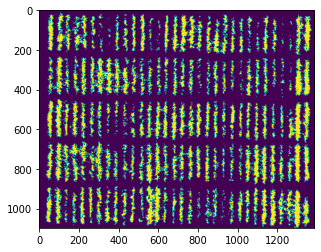

In [149]:
def extract_veg_mask(ndvi, threshold):

    ### YOUR ANSWER HERE ###
    x = (ndvi > threshold).astype(int)
    return x

    ########################
msi_nvdi = (((msi[4,:,:] - msi[2,:,:]) / (msi[4,:,:] + msi[2,:,:])))
plt.imshow(extract_veg_mask(msi_nvdi, 0.85))
plt.show()

# Shapefiles

Shapefiles are often useful in working with raster data. For this lab, we have a shapefile in the lab folder named <code>Plot.shp</code> which is the boundary of each plot for the Sorghum image. That means, they are geographically related to each other.

To open shapefiles, there are several python packages. We will be exploring <code>geopandas</code>. This one is NOT available in Colab as well. We need to install it.

In [150]:
# Check if geopandas is installed,
# if not, install it
try:
    import geopandas as gpd
except:
    !pip install geopandas
    import geopandas as gpd

[geopandas](https://geopandas.org/index.html) is primirality developed on top of [pandas](https://pandas.pydata.org/), which is a very powerful data science tool for tabular data. The geopandas is basically a pandas dataframe with an extra column with geogrpahic information. The geographic information is stored with the help of [shapely](https://shapely.readthedocs.io/en/stable/manual.html) and [fiona](https://fiona.readthedocs.io/en/latest/manual.html). We dont need to learn all of them. But get used to some of the features.

In [151]:
# Read the shapefile
plots = gpd.read_file('/content/drive/MyDrive/lab2/Plot.shp') 
print(type(plots))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [152]:
# Open the plots
plots

NBI      CHL     FLAV  Plot  \
0   39.8725  43.3285  1.09950  3002   
1   43.2125  47.8908  1.14225  3003   
2   57.0500  44.7487  0.81175  3004   
3   34.5575  43.4745  1.27700  3005   
4   50.5425  49.5355  1.07500  3006   
..      ...      ...      ...   ...   
65  47.2850  45.3592  0.99825  3411   
66  63.0350  48.0807  0.77075  3412   
67  37.9725  42.7243  1.21625  3413   
68  52.7875  48.0083  0.91600  3414   
69  33.0100  41.7665  1.38025  3415   

                                             geometry  
0   POLYGON ((408993.407 3660091.200, 408993.376 3...  
1   POLYGON ((408994.932 3660091.186, 408994.900 3...  
2   POLYGON ((408996.455 3660091.172, 408996.424 3...  
3   POLYGON ((408997.979 3660091.158, 408997.948 3...  
4   POLYGON ((408999.503 3660091.144, 408999.472 3...  
..                                                ...  
65  POLYGON ((409007.268 3660107.015, 409007.236 3...  
66  POLYGON ((409008.792 3660107.001, 409008.760 3...  
67  POLYGON ((409010.316 3660106.987, 409010.284 3...  
68  POLYGON ((409011.840 3660106.973, 409011.808 3...  
69  POLYGON ((409013.364 3660106.960, 409013.332 3...  

[70 rows x 5 columns]

Just like any pandas dataframe, the NBI, CHL, FLAV, and Plot are the columns. The geometry column at the end is the column which stores the spatial information. Let's try to visualize it:

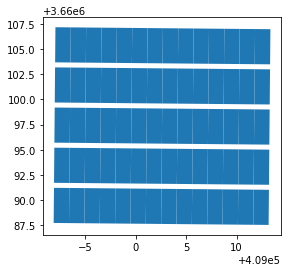

In [153]:
plots.plot()
plt.show()

The columns are some average chemical properties of sorghum leaves for each plot. NBI and CHL represents the Nitrogen Balance Index and Chlorophyll Concentration, respectively. Let's make a chloropleth map by adding different colormap based on the chlorophyll values:

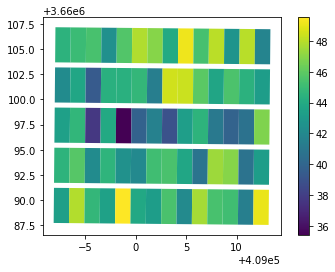

In [154]:
plots.plot(column='CHL', legend=True)
plt.show()

For any dataframe (either pandas or geopandas), we can access certain cell values using index just like numpy. To do that we need to leverage the <code>.iloc</code> method.

In [155]:
# Print the CHL information of the 5th row
print(plots.iloc[4, 1]) # 4 = index of 5th row, 1 = CHL column index

49.5355


In [156]:
# Print the NBI information of the second from the last row
print(plots.iloc[-2, 0])

52.7875


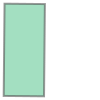

In [157]:
# Get the geometry of the 9th row
plots.iloc[8, -1]

In [158]:
type(plots.iloc[8, -1])

shapely.geometry.polygon.Polygon

# Combining geopandas and rasterio

Often time we may get a raster image for a study area and need to clip small image portions based on a shapefile. Here we have a multispectral image of sorghum field and associated plot boundary. Now we want to clip the image based on one polygon feature.

In [159]:
from rasterio import mask

In [160]:
mask_img = mask.mask(dataset=src, shapes=[plots.iloc[8, -1]], nodata=np.nan, filled=True, crop=True)[0]

Here we used the <code>mask</code> module of <code>rasterio</code>. Please refer to the [source](https://rasterio.readthedocs.io/en/latest/api/rasterio.mask.html) for more information about different parameters. The dataset takes the rasterio object as input (not the np array, the rasterio object), and a sample plot boundary (in this case it was the 9th sample). Look that the geometry information was provided inside a list ([ ]) for the <code>shapes</code> parameter. Otherwise, it wont work. Now examine the shape of the <code>mask_img</code>:

In [161]:
print(mask_img.shape)

(5, 192, 86)


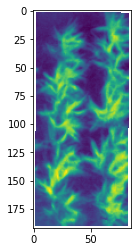

In [162]:
# Visualize the NIR band
plt.imshow(mask_img[4, :, :])
plt.show()

Let's try to create a function that clips the image and returns the mean value of different channels. We will also use that in a for loop to automate this task for all the features and create a tabular dataframe from this:

In [163]:
def extract_by_mask(src, shape_geom):
    """
    Extract the masked image based on the given shape geometry.
    Arguments:
      - src: a rasterio image object
      - shape_geom: the shapely geometry object
    Returns:
      - a cropped image
    """
    # Apply the masking 
    mask_img = mask.mask(dataset=src, shapes=[shape_geom], nodata=np.nan, filled=True, crop=True)[0]

    # Get the mean values
    blue_mean = np.nanmean(mask_img[0, :, :]) ## IMPORTANT: use nanmean since the array contains np.nan values
    green_mean = np.nanmean(mask_img[1, :, :])
    red_mean = np.nanmean(mask_img[2, :, :])
    rededge_mean = np.nanmean(mask_img[3, :, :])
    nir_mean = np.nanmean(mask_img[4, :, :])

    return blue_mean, green_mean, red_mean, rededge_mean, nir_mean


# Apply this function as for loop for the entire plots shapefile features

# Get the total number of features
num_features = plots.shape[0]

# Create empty lists to hold the information of channel means and plot ids
list_blue_mean = []
list_green_mean = []
list_red_mean = []
list_rededge_mean = []
list_nir_mean = []
list_plotids = []

# Iterate through that range of numbers
for i in range(num_features):

    # Get the geometry information for the i-th sample
    shape_geom = plots.iloc[i, -1]

    # Get the plotid information as well
    plotid = plots.iloc[i, 3]

    # Apply the mask function
    blue_mean, green_mean, red_mean, rededge_mean, nir_mean = extract_by_mask(src, shape_geom)

    # Append the information to each empty list
    list_blue_mean.append(blue_mean)
    list_green_mean.append(green_mean)
    list_red_mean.append(red_mean)
    list_rededge_mean.append(rededge_mean)
    list_nir_mean.append(nir_mean)
    list_plotids.append(plotid)

# Create a pandas dataframe with the plot id and channel means

# Import the pandas module
import pandas as pd

# Create the dataframe
mean_reflectance = pd.DataFrame({
    'PlotID': list_plotids,
    'Blue': list_blue_mean,
    'Green': list_green_mean,
    'Red': list_red_mean,
    'RedEdge': list_rededge_mean,
    'NIR': list_nir_mean,
})

In [164]:
mean_reflectance

PlotID      Blue     Green       Red   RedEdge       NIR
0    3002  0.030873  0.071235  0.054182  0.145741  0.373252
1    3003  0.029552  0.071626  0.046477  0.147333  0.416386
2    3004  0.029150  0.071763  0.048138  0.148739  0.407950
3    3005  0.031598  0.074357  0.051506  0.153315  0.415670
4    3006  0.032016  0.070093  0.056470  0.144700  0.392066
..    ...       ...       ...       ...       ...       ...
65   3411  0.029048  0.071462  0.046833  0.146953  0.419946
66   3412  0.031509  0.072258  0.054362  0.147203  0.399217
67   3413  0.036270  0.075572  0.068512  0.150043  0.364333
68   3414  0.032065  0.071908  0.056013  0.147754  0.405300
69   3415  0.041167  0.078317  0.084648  0.154914  0.325603

[70 rows x 6 columns]